# Least Squares Approximation Method

<h3>Module</h3>

<span>
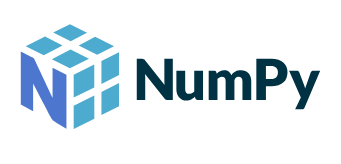
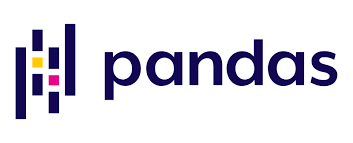
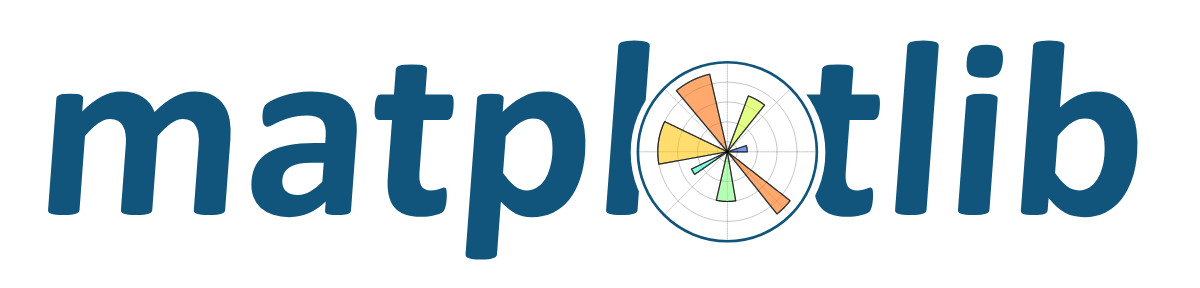
<br>
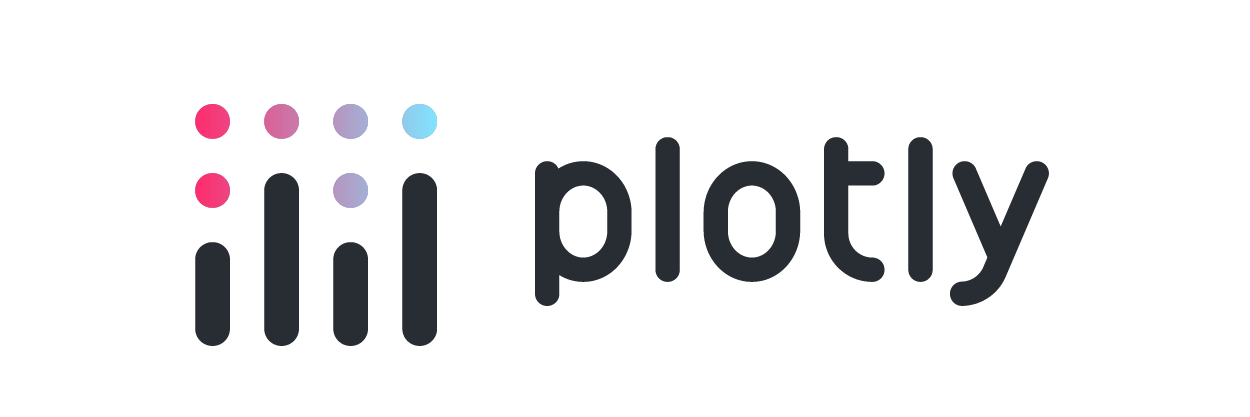
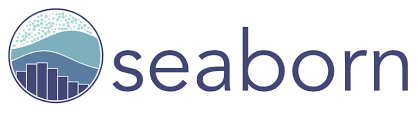
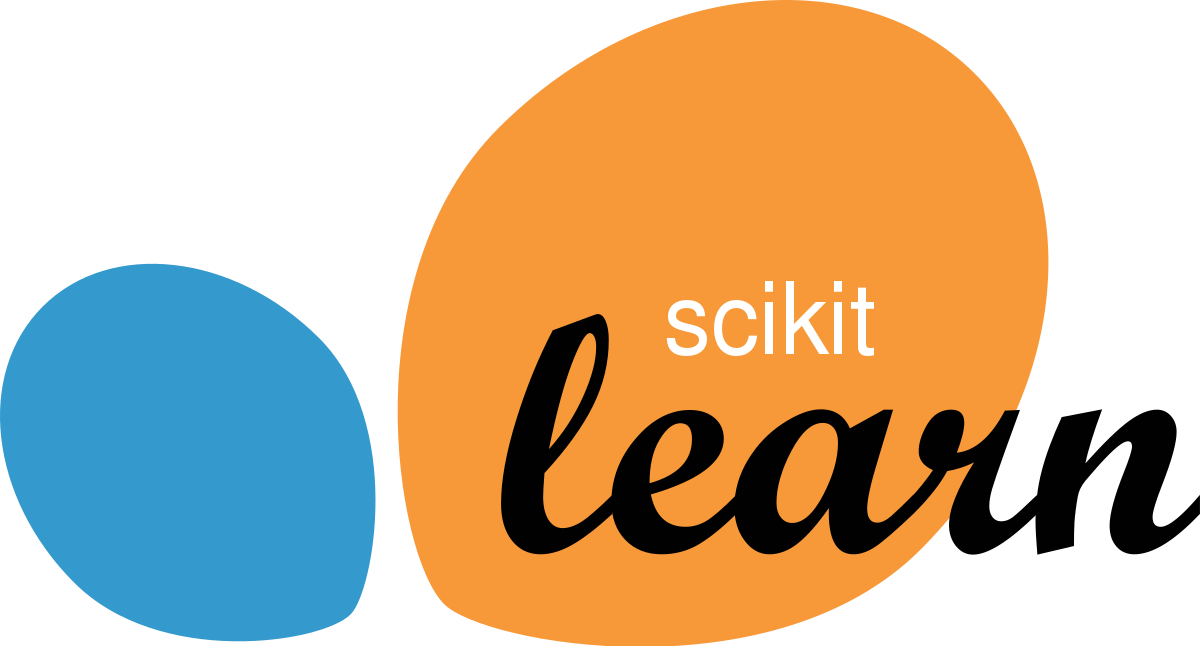
</span>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Import Data Set <code>Advertising.csv</code></h3>

In [ ]:
df_Ad = pd.read_csv('Advertising.csv')
df_Ad.head()

In [ ]:
df_Ad.info()

In [ ]:
df_Ad.isnull().sum()

In [ ]:
df_Ad.drop('Unnamed: 0', axis=1, inplace=True)

<h4> Calculate <code>Correlation Coefficient (Pearson's)</code> for display relation of data
$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$
<h4>or use function<code>dataframe.corr()</code></h4>

In [ ]:
sns.heatmap(df_Ad.corr(), annot=True)

<h4>Scatter Plot</h4>

In [ ]:
# Plotly
go.Figure(go.Scatter(x=df_Ad.TV, y=df_Ad.Sales, mode='markers', name='Data'))

In [ ]:
# Matplotlib
plt.scatter(df_Ad.TV, df_Ad.Sales)

<h3>Preprocess Data</h3>
<h4>Size of Matrix $\matrix{X}$ = m x 2</h4>
<h4>Size of Vec-Column $\vec{y}$ = m x 1</h4>
<h4>where $m$ = number of data</h4>

In [ ]:
X = df_Ad[['TV']].values
y = df_Ad[['Sales']].values
# Concatenate between 1 and X data
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)

In [ ]:
print(f'X shape: {X.shape} \ny shape: {y.shape}')

<h3>Data Spliting <code>Train Test Split</code></h3>

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 58 699199

In [ ]:
print(f"X_train shape = {X_train.shape} \ny_train shape = {y_train.shape} \n------------------")
print(f"X_test shape = {X_test.shape} \ny_test shape = {y_test.shape}")

<h3>SSE (Sum of Squares Error) Calculation when {intercept = 0, slope = 0}</h3>
$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 1], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 1], y = 0 + 0 * X_train[:, 1], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation when {intercept = 0, slope = 0}</h3>
$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$

In [ ]:
# SSE when intercept, slope = 0
beta_0 = np.array([[0],
                  [0]])
y_pred_0 = X_train @ beta_0

SSE_0 = (y_train - y_pred_0).T@(y_train - y_pred_0)

scientific_notation = "{:e}".format(SSE_0[0, 0])
print(f"SSE_0 = {SSE_0[0, 0]}, {scientific_notation}")

<h3>Create function <code>least_square_approximation()</code> for approximate parameter {Intercept, Slope} use</h3>
<h2>$$\beta = (X^T X)^{-1} X^T y$$</h2>

In [ ]:
def least_square_approximation(X, y):
    Xtran_dot_X = X.T @ X
    Xtran_dot_y = X.T @ y
    beta = np.linalg.inv(Xtran_dot_X) @ (Xtran_dot_y)
    return beta

<h3>Approximation Parameter Values</h3>

In [ ]:
beta = least_square_approximation(X_train, y_train)
intercept, slope = beta[0, 0], beta[1, 0]
print(f"Intercept = {intercept}, Slope = {slope}")

<h3>Scatter Plot with Linear Regression Line</h3>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 1], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 1], y = intercept + slope * X_train[:, 1], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation after approximate parameter values</h3>
$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$

In [ ]:
# SSE after approximate Intercept and Slope
y_pred_train_set = X_train @ beta

SSE = (y_train - y_pred_train_set).T @ (y_train - y_pred_train_set)

scientific_notation = "{:e}".format(SSE[0, 0])
print(f"SSE = {SSE[0, 0]}, {scientific_notation}")

<h3>R-Squared</h3>

In [ ]:
# R-Squared
y_pred_test_set = X_test @ beta

r2 = r2_score(y_test, y_pred_test_set)
print(f"R-squared: {r2}")

<h3>Prediction</h3>

In [ ]:
# Prediction
Ad_spen_TV = float(input())
predict_sales = beta[0, 0] + beta[1, 0] * Ad_spen_TV
print(f"Ad Spending of TV = {Ad_spen_TV} units\n----------------------------------\nPrediction of Sales = {round(predict_sales, 4)} units") 

In [ ]:
import gradio as gr

def prediction(X):
    y_pred = beta[0,0] + beta[1,0]*X
    return round(y_pred, 4)

demo = gr.Interface(
    fn=prediction,
    inputs=["number"],
    outputs=["text"],
)

demo.launch()
